In [4]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [10]:
# Get overview of the dataset
df.head()

,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


In [10]:
df.shape

(2443651, 9)

#### Part 1: Understanding Product Categories


In [49]:
# 1 
# Select top 5 most listed product categories
top_products = df['category'].value_counts()
top_products.head(10)
top_products[1:10]

category
Beauty                                    19312
Handmade Clothing, Shoes & Accessories    19229
Bath & Body                               19092
Birthday Gifts                            18978
Manicure & Pedicure Products              18940
Skin Care                                 18769
Make-up                                   18756
Hair Care                                 18735
Fragrances                                18564
Name: count, dtype: int64

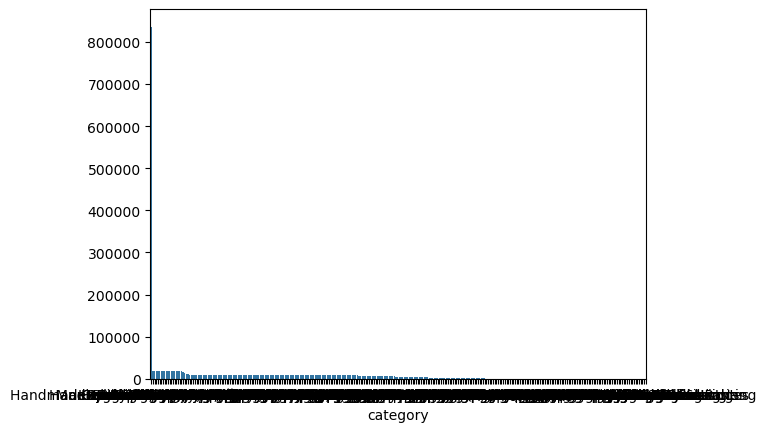

In [51]:
# 2 - Barplot - All categories -> not nice
sns.barplot(x=top_products.index, y=top_products.values);

[Text(0.5, 0, 'Total Counts'),
 Text(0, 0.5, 'Product Category'),
 Text(0.5, 1.0, 'Top 10 Amazon UK Product Categories')]

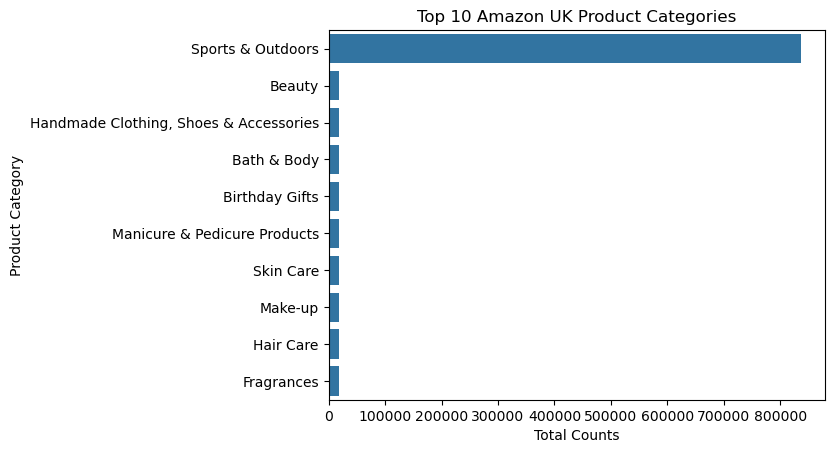

In [61]:
# 2 - Barplot: Top 10 products
top_10_products_sports = df['category'].value_counts().head(10)
top_10_products_sports
top_10_products_sports_plot = sns.barplot(y=top_10_products_sports.index, x=top_10_products_sports.values, )
top_10_products_sports_plot.set(xlabel = 'Total Counts',
                         ylabel = 'Product Category',
                         title = 'Top 10 Amazon UK Product Categories')

[Text(0.5, 0, 'Total Counts'),
 Text(0, 0.5, 'Product Category'),
 Text(0.5, 1.0, 'Top 10 Amazon UK Product Categories (without Sports & Outdoors)')]

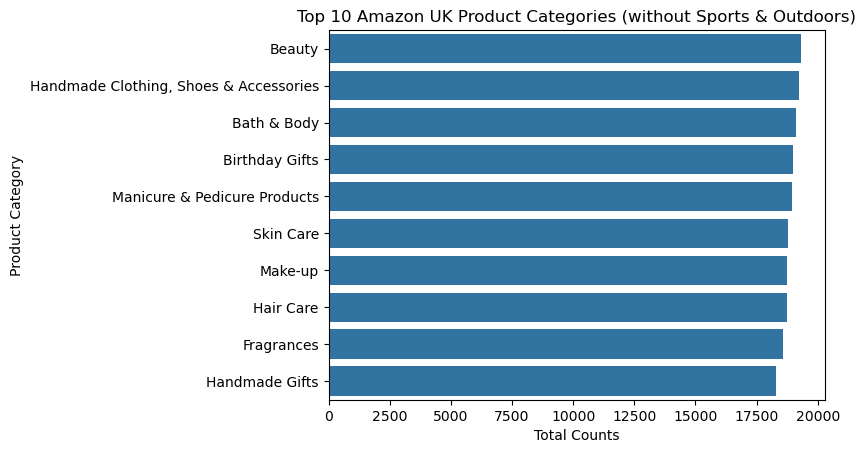

In [63]:
# 2 - Barplot: Top 10 products (without Sports & Outdoors)
top_10_products = df['category'].value_counts()[1:11]
top_10_products
top_10_products_plot = sns.barplot(y=top_10_products.index, x=top_10_products.values, )
top_10_products_plot.set(xlabel = 'Total Counts',
                         ylabel = 'Product Category',
                         title = 'Top 10 Amazon UK Product Categories (without Sports & Outdoors)')

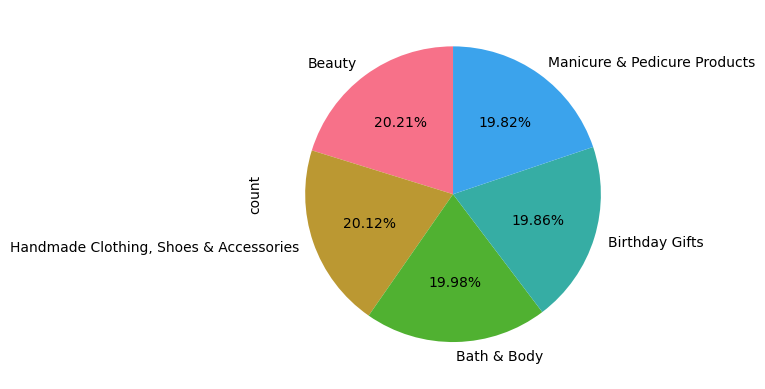

In [115]:
# 2 - Piechart: Top 5 products (without Sports & Outdoors)
# Version 1

df['category'].value_counts()[1:6].plot.pie(autopct='%.2f%%', startangle=90, colors=sns.color_palette('husl'));

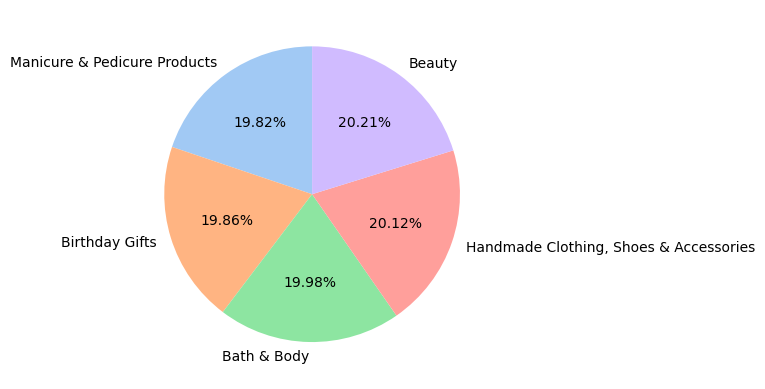

In [32]:
#!# ADD title + legends

# Version 2

top_5_products_plot = df['category'].value_counts()[1:6].sort_values(ascending=True)
top_5_products_plot
plt.pie(top_5_products_plot, startangle=90, labels=top_5_products_plot.index, autopct='%.2f%%', colors=sns.color_palette('pastel'));

#### Part 2: Delving into Product Pricing



In [41]:
# 1 Measures of Centrality

product_price_mean = df['price'].mean()
print(f"Mean: {round(product_price_mean, 2)}")
product_price_median = df['price'].median()
print(f"Median: {round(product_price_median, 2)}")
product_price_mode = df['price'].mode()[0]
print(f"Mode: {round(product_price_mode, 2)}")

Mean: 89.24
Median: 19.09
Mode: 9.99


- The average price point (i.e. the mean) of products is almost 10 times higher than the most common price point (i.e. the mode) of all products.
- This suggests that there are some very expensive products in the product catalogue, which push the general average upwards to almost 90 GBP. At the same time, the price of most products is less than 10 GBP.
- The median value underlines this once again: half of all values are below the 19 GBP mark.

In [39]:
# 2 Measures of Dispersion 

# Variance
product_price_var = df['price'].var()
print(f"Variance: {round(product_price_var, 2)}")

# Standard deviation
product_price_std = df['price'].std()
print(f"Standard deviation: {round(product_price_std, 2)}")

# Range
product_price_range = df['price'].max() - df['price'].min()
print(f"Range: {round(product_price_range, 2)}")

# Interquartile_range
product_price_interquartile_range = df['price'].quantile(0.75) - df['price'].quantile(0.25)
print(f"Interquartile range: {round(product_price_interquartile_range, 2)}")

# Minimum and maximum price values
print(f"Minimum price: {df['price'].min()}")
print(f"Maximum price: {df['price'].max()}")

Variance: 119445.49
Standard deviation: 345.61
Range: 100000.0
Interquartile range: 36.0
Minimum price: 0.0
Maximum price: 100000.0


- The standard deviation of 345,61 suggests that prices are highly dispersed.
- The range of 100,000 suggests that prices vary strongly, given that the smallest price value is 0 GBP (which should probably be cleaned) and the highest price is 100,000 GBP.
- The IQR of only 36.0 suggests that most prices within the middle range of the dataset are actually quite close together compared to the overall range.

In [43]:
# 3 Visualizations

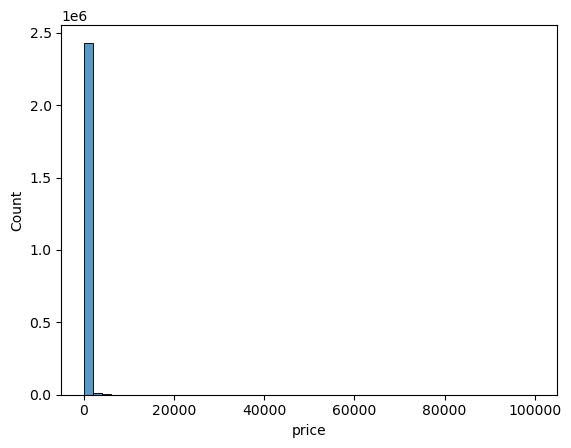

In [45]:
#!# ADD title + legends + some nice formatting (?)

# Histogram
sns.histplot(df['price'], bins=50);

- Difficult to plot since almost 2.5 million products are plotted under the first bin.
- The wide dispersion of extremely high prices versus the lower quartile of prices does not generate any real insight.

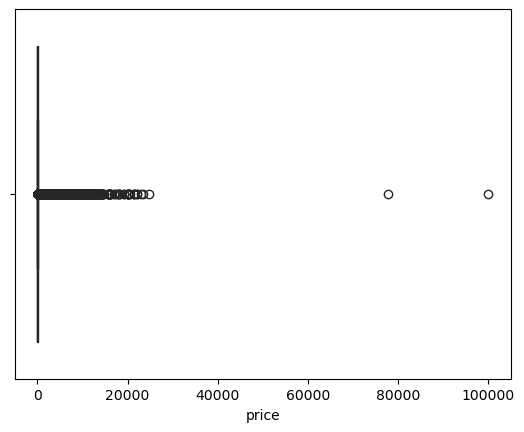

In [47]:
#!# ADD title + legends + some nice formatting (?)

# Boxplot
sns.boxplot(x = df['price'], color='purple');

- Two heavy outliers: approx. 80,000 GBP and 100,000 GBP

#### Part 3: Unpacking Product Ratings


In [12]:
# 1 Calculate measures of centrality of product rating

product_rating_mean = df['stars'].mean()
print(f"Mean: {round(product_rating_mean, 2)}")

product_rating_median = df['stars'].median()
print(f"Median: {round(product_rating_median, 2)}")

product_rating_mode = df['stars'].mode()[0]
print(f"Mode: {round(product_rating_mode, 2)}")

df.describe()

Mean: 2.15
Median: 0.0
Mode: 0.0


- The median and the mode suggest 50% of the products are rated with 0 stars, suggesting that most products either lack a review or are rated poorly
- The overall average rating is therefore rather low (only 2.1 out of 5 stars). 

In [49]:
# 2. Calculate measures of dispersion of product rating

# Variance
product_rating_var = df['stars'].var()
print(f"Variance: {round(product_rating_var, 2)}")

# Standard deviation
product_rating_std = df['stars'].std()
print(f"Standard deviation: {round(product_rating_std, 2)}")

# Interquartile_range
product_rating_interquartile_range = df['stars'].quantile(0.75) - df['stars'].quantile(0.25)
print(f"Interquartile range: {round(product_rating_interquartile_range, 2)}")

# Minimum and maximum price values
print(f"Minimum rating: {df['stars'].min()}")
print(f"Maximum rating: {df['stars'].max()}")

Variance: 4.82
Standard deviation: 2.19
Interquartile range: 4.4
Minimum rating: 0.0
Maximum rating: 5.0


- The standard deviation is nearly as large as the mean, which suggests a wide range in the ratings. This high variability implies a mix of both high and low ratings in the dataset.
- The high variance and standard deviation indicate that ratings are spread out across the entire range (0 to 5), with no strong central clustering.
- Only the top 25% of products achieve ratings above 4.4, highlighting that the best ratings are relatively rare.

In [51]:
# 3 Calculate shape of distribution of product rating

# Skewness
product_rating_skew = df['stars'].skew()
print(f"Skewness: {round(product_rating_skew, 2)}")

# Kurtosis
product_rating_kurtosis = df['stars'].kurtosis()
print(f"Kurtosis: {round(product_rating_kurtosis, 2)}")

Skewness: 0.08
Kurtosis: -1.93


- Low Skewness (0.08): Indicates a distribution that is almost symmetrical, even though a concentration of 0 values affects interpretation.
- Negative Kurtosis (-1.93): Suggests a flat, spread-out distribution without heavy tails, meaning that most ratings are neither concentrated at the extreme high or low ends.

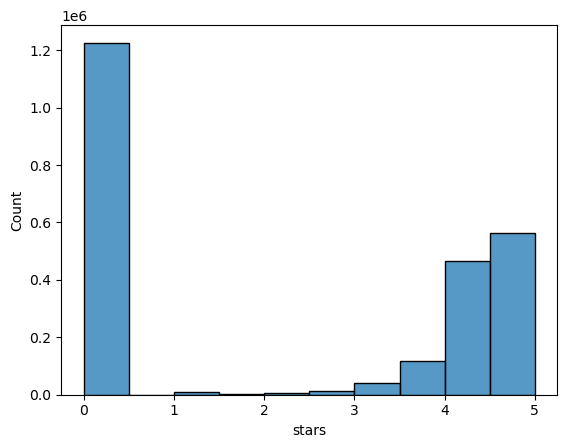

In [53]:
#4 Visualization 

sns.histplot(df['stars'], bins = 10);

- The histogram confirms that the majority of values are 0, suggesting either low rating or missing reviews.
- However, looking at the two bars displaying ratings of above 4, they almost add up to the same number as the 0 star reviews.
- This indicates that most ratings are either high (4 stars and more) or extremely low or missing. 